In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation

from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats
from sklearn.metrics import mean_squared_error


In [2]:
dt = pd.read_csv("csv\heart_statlog_cleveland_hungary_final.csv")
dt.columns = dt.columns.str.replace(' ', '_')
dt

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [5]:
dt['chest_pain_type'].value_counts()
dt['rest_ecg'].value_counts()
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [6]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [7]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [8]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [9]:
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [10]:
# Assuming you have a DataFrame called 'df' with categorical columns
categorical_columns = dt.select_dtypes(include=[object])

# Get summary statistics for categorical columns
summary_statistics = categorical_columns.describe()

# Display the summary statistics
print(summary_statistics)

         sex chest_pain_type rest_ecg st_slope
count   1189            1189     1189     1189
unique     2               4        3        3
top     male    asymptomatic   normal     flat
freq     908             625      683      582


In [11]:
# removing outliers
dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]
z = np.abs(stats.zscore(dt_numeric))
dt = dt[(z < 3).all(axis=1)]
dt.shape


(1172, 12)

In [12]:
dt = pd.get_dummies(dt, drop_first=True)
X = dt.drop(['target'],axis=1)
y = dt['target']

<Axes: title={'center': 'Correlation with target'}>

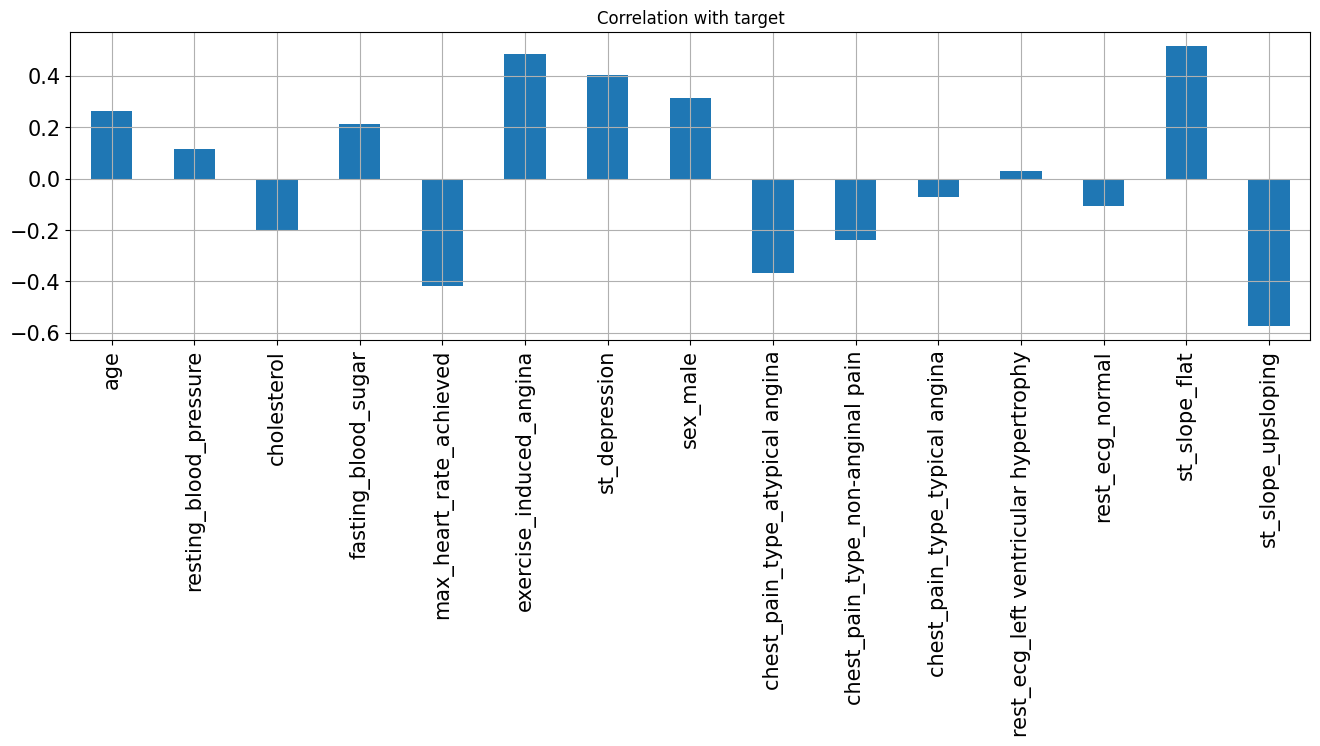

In [13]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with target", fontsize = 15,
        rot = 90, grid = True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [15]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of traget variable in test set
1    123
0    112
Name: target, dtype: int64


In [16]:

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(937, 15)
(937,)
(235, 15)
(235,)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,0,1,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,0,1,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.387755,0.408602,0.515275,0,0.829630,0,0.194805,1,0,1,0,0,1,0,1
1095,0.551020,0.408602,0.533605,0,0.651852,0,0.194805,1,1,0,0,0,1,0,1
760,0.469388,0.354839,0.433809,0,0.429630,1,0.376623,1,0,0,1,1,0,0,1
1083,0.836735,0.731183,0.476578,1,0.474074,0,0.207792,1,0,0,1,1,0,1,0


In [18]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])


# Model Building 

In [19]:
# data=pd.read_csv("csv\heart_statlog_cleveland_hungary_final.csv")


In [20]:
# X_train=data.drop('target',axis=1)
# y_train=data['target']

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

len(y_pred_rfe)

235

In [22]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForestClassifier model
rf_ent = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_ent.fit(X_train, y_train)

# Save the model to a pickle file
model_file = 'random_forest_model_2.pkl'
with open(model_file, 'wb') as file:
    pickle.dump(rf_ent, file)


In [23]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Load the saved model
model_file = 'random_forest_model_2.pkl'
with open(model_file, 'rb') as file:
    loaded_model = pickle.load(file)


predictions = loaded_model.predict(X_train)





In [24]:
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix


model_file = 'random_forest_model_2.pkl'
with open(model_file, 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(X_test)

actual_labels = y_test
confusion_matrix_result = confusion_matrix(actual_labels, predictions)


classification_table = pd.DataFrame(confusion_matrix_result, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

classification_table


,Predicted 0,Predicted 1
Actual 0,94,18
Actual 1,6,117


In [25]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

In [26]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [27]:
# Multi Layer Perceptron
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from ml_enviroment import data_processing, training_preprocessing

def execute_ml_prediction(data_source):
    # Load and preprocess the data
    dt = data_processing(data_source, drop_null=True)
    X_train, X_test, y_train, y_test = training_preprocessing(dt)

    # Train the Random Forest with entropy criterion
    rf_ent = RandomForestClassifier(criterion='entropy', n_estimators=100)
    rf_ent.fit(X_train, y_train)

    # Train an ExtraTreesClassifier
    extra_trees = ExtraTreesClassifier(n_estimators=100)
    extra_trees.fit(X_train, y_train)

    # Train an XGBoost classifier
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    rf_ent_predictions = rf_ent.predict(X_test)
    extra_trees_predictions = extra_trees.predict(X_test)
    xgb_predictions = xgb_model.predict(X_test)

    # Calculate evaluation metrics for each model
    rf_ent_metrics = {
        "Accuracy": accuracy_score(y_test, rf_ent_predictions),
        "Precision": precision_score(y_test, rf_ent_predictions),
        "Recall": recall_score(y_test, rf_ent_predictions),
        "F1 Score": f1_score(y_test, rf_ent_predictions)
    }

    extra_trees_metrics = {
        "Accuracy": accuracy_score(y_test, extra_trees_predictions),
        "Precision": precision_score(y_test, extra_trees_predictions),
        "Recall": recall_score(y_test, extra_trees_predictions),
        "F1 Score": f1_score(y_test, extra_trees_predictions)
    }

    xgb_metrics = {
        "Accuracy": accuracy_score(y_test, xgb_predictions),
        "Precision": precision_score(y_test, xgb_predictions),
        "Recall": recall_score(y_test, xgb_predictions),
        "F1 Score": f1_score(y_test, xgb_predictions)
    }

    # Create DataFrames for metrics
    rf_ent_metrics_df = pd.DataFrame(rf_ent_metrics, index=["Random Forest Entropy"])
    extra_trees_metrics_df = pd.DataFrame(extra_trees_metrics, index=["ExtraTreesClassifier"])
    xgb_metrics_df = pd.DataFrame(xgb_metrics, index=["XGBoost"])

    # Concatenate the DataFrames to create a single result DataFrame for metrics
    metrics_df = pd.concat([rf_ent_metrics_df, extra_trees_metrics_df, xgb_metrics_df])

    # Create confusion matrices for each model
    rf_ent_confusion = confusion_matrix(y_test, rf_ent_predictions)
    extra_trees_confusion = confusion_matrix(y_test, extra_trees_predictions)
    xgb_confusion = confusion_matrix(y_test, xgb_predictions)

    # Create a DataFrame for confusion matrices with 3 rows and 4 columns
    confusion_df = pd.DataFrame(data=[rf_ent_confusion.ravel(), extra_trees_confusion.ravel(), xgb_confusion.ravel()],
                               columns=['TN', 'FP', 'FN', 'TP'],
                               index=['Random Forest Entropy', 'ExtraTreesClassifier', 'XGBoost'])

    return metrics_df, confusion_df

metrics_df, confusion_df= execute_ml_prediction("csv\heart_statlog_cleveland_hungary_final.csv")
print("Evaluation Metrics:")
print(metrics_df)
print("\nConfusion Matrices:")
print(confusion_df)



Evaluation Metrics:
                       Accuracy  Precision    Recall  F1 Score
Random Forest Entropy  0.812766   0.784173  0.886179  0.832061
ExtraTreesClassifier   0.825532   0.797101  0.894309  0.842912
XGBoost                0.770213   0.794872  0.756098  0.775000

Confusion Matrices:
                       TN  FP  FN   TP
Random Forest Entropy  82  30  14  109
ExtraTreesClassifier   84  28  13  110
XGBoost                88  24  30   93


array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [29]:
### K nearest neighbour (n=9)
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [30]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

In [31]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [32]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [33]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [34]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [35]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [36]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [37]:
# CM=confusion_matrix(y_test,y_pred_rfe)
# sns.heatmap(CM, annot=True)

# TN = CM[0][0]
# FN = CM[1][0]
# TP = CM[1][1]
# FP = CM[0][1]
# specificity = TN/(TN+FP)
# loss_log = log_loss(y_test, y_pred_rfe)
# acc= accuracy_score(y_test, y_pred_rfe)
# roc=roc_auc_score(y_test, y_pred_rfe)
# prec = precision_score(y_test, y_pred_rfe)
# rec = recall_score(y_test, y_pred_rfe)
# f1 = f1_score(y_test, y_pred_rfe)
# mathew = matthews_corrcoef(y_test, y_pred_rfe)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
# model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew,rmse]],
#                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef','RMSE'])

# model_results


In [38]:
data = {        'Random Forest':y_pred_rfe,
                'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef', 'RMSE'])

for column in models:
    CM = confusion_matrix(y_test, models[column])

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    rmse = np.sqrt(mean_squared_error(y_test, models[column]))
    mathew = matthews_corrcoef(y_test, models[column])
    
    results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew, rmse]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef', 'RMSE'])
    
    model_results = model_results.append(results, ignore_index=True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,RMSE
0,Random Forest,0.897872,0.866667,0.951220,0.839286,0.906977,0.895253,3.681054,0.798545,0.319574
1,MLP,0.838298,0.810219,0.902439,0.767857,0.853846,0.835148,5.828335,0.678977,0.402122
2,KNN,0.808511,0.786765,0.869919,0.741071,0.826255,0.805495,6.901976,0.618029,0.437595
3,EXtra tree classifier,0.902128,0.878788,0.943089,0.857143,0.909804,0.900116,3.527677,0.805512,0.312846
4,XGB,0.893617,0.865672,0.943089,0.839286,0.902724,0.891188,3.834431,0.789339,0.326164
5,SVC,0.825532,0.801471,0.886179,0.758929,0.841699,0.822554,6.288467,0.652539,0.417694
6,SGD,0.804255,0.769231,0.894309,0.705357,0.827068,0.799833,7.055353,0.613634,0.442430
7,Adaboost,0.834043,0.813433,0.886179,0.776786,0.848249,0.831482,5.981713,0.668866,0.407379
8,CART,0.834043,0.833333,0.853659,0.812500,0.843373,0.833079,5.981713,0.667176,0.407379
9,GBM,0.851064,0.818841,0.918699,0.776786,0.865900,0.847742,5.368204,0.705544,0.385922


In [39]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import pandas as pd
import numpy as np

# ... (other imports and functions)

def feature_transformation(X_train, X_test, y_train, xgb_model):
    rf_ent = RandomForestClassifier(criterion='entropy', n_estimators=100)
    rf_ent.fit(X_train, y_train)
    y_pred_rfe = rf_ent.predict(X_test)
    
    et_100 = ExtraTreesClassifier(n_estimators=100)
    et_100.fit(X_train, y_train)
    y_pred_et_100 = et_100.predict(X_test)
    
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    
    feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
    feat_importances_2 = pd.Series(et_100.feature_importances_, index=X_train.columns)
    feat_importance_3 = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
    
    feature_importances_df = pd.DataFrame({
        "Random Forest (Entropy)": feat_importances,
        "Extra Trees (100 Estimators)": feat_importances_2,
        "XGBoost (500 Estimators)": feat_importance_3
    })
    
    feature_importances_df = feature_importances_df.transpose()
    return feature_importances_df

# Pass the XGBoost model as an argument
xgb_model = xgb.XGBClassifier(n_estimators=500)
feature_importances_df = feature_transformation(X_train, X_test, y_train, xgb_model)
feature_importances_df


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
Random Forest (Entropy),0.091495,0.084812,0.120715,0.024835,0.134415,0.080576,0.109918,0.050429,0.047253,0.038964,0.013423,0.020580,0.016531,0.061123,0.104930
Extra Trees (100 Estimators),0.072741,0.074131,0.082535,0.033148,0.087773,0.108906,0.083787,0.061664,0.057955,0.045402,0.017159,0.020613,0.018374,0.128877,0.106935
XGBoost (500 Estimators),0.009902,0.011064,0.012766,0.045461,0.013746,0.038717,0.013348,0.041563,0.063117,0.038083,0.032932,0.018944,0.006083,0.012396,0.641877


<Axes: >

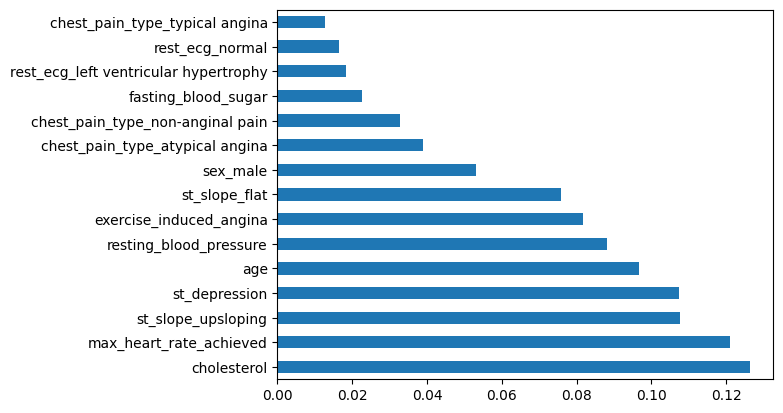

In [40]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances_2 = pd.Series( et_100.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [41]:
from database_handler import return_data_as_df
from lookups import InputTypes ,ChestPainType, RestECGType, StSlopeType, SexType
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def data_processing(Source, drop_null=True):
  dt=pd.read_csv(Source)
  dt.columns=dt.columns.str.replace(' ', '_')

  dt['chest_pain_type'] = dt['chest_pain_type'].map({member.value: member.name for member in ChestPainType})
  dt['resting_ecg'] = dt['resting_ecg'].map({member.value: member.name for member in RestECGType})
  dt['ST_slope'] = dt['ST_slope'].map({member.value: member.name for member in StSlopeType})
  dt['sex'] = dt['sex'].map({member.value: member.name for member in SexType})
  dt.drop(dt[dt.ST_slope ==0].index, inplace=True)
  

    
  if drop_null:
        dt = dt.dropna()
  dt_numeric = dt[['age','resting_bp_s','cholesterol','max_heart_rate']]
  z = np.abs(stats.zscore(dt_numeric))
  dt = dt[(z < 3).all(axis=1)]
  return dt
def training_preprocessing(dt):
    dt = pd.get_dummies(dt, drop_first=True)
    X = dt.drop(['target'],axis=1)
    y = dt['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)
    scaler = MinMaxScaler()
    X_train[['age','resting_bp_s','cholesterol','max_heart_rate','oldpeak']] = scaler.fit_transform(X_train[['age','resting_bp_s','cholesterol','max_heart_rate','oldpeak']])

    return X_train, X_test, y_train, y_test


In [42]:
dt=data_processing("csv/heart_statlog_cleveland_hungary_final.csv")
X_train, X_test, y_train, y_test=training_preprocessing(dt)
X_train.shape



(937, 15)

In [43]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

def model_building(X_train, X_test, y_train, y_test):
    classifiers = [
        ("Random Forest (Entropy)", RandomForestClassifier(criterion='entropy', n_estimators=100)),
        ("MLP", MLPClassifier()),
        ("K-Nearest Neighbors (K=9)", KNeighborsClassifier(n_neighbors=9)),
        ("Extra Trees (100 Estimators)", ExtraTreesClassifier(n_estimators=100)),
        ("XGBoost (500 Estimators)", XGBClassifier(n_estimators=500)),
        ("SVC (Linear)", SVC(kernel='linear', gamma='auto', probability=True)),
        ("SGD", SGDClassifier(max_iter=1000, tol=1e-4)),
        ("AdaBoost", AdaBoostClassifier()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, max_features='sqrt'))
    ]

    y_preds = {}
    trained_classifiers = {}

    for name, classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_preds[name] = classifier.predict(X_test)
        trained_classifiers[name] = classifier

    return y_test, y_preds, trained_classifiers




In [44]:
y_test, y_preds,trained_classifiers=model_building(X_train, X_test, y_train, y_test)


In [45]:
def calculate_metrics(models, y_test):
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef', 'RMSE'])

    for column in models:
        CM = confusion_matrix(y_test, models[column])

        TN = CM[0][0]
        FN = CM[1][0]
        TP = CM[1][1]
        FP = CM[0][1]
        specificity = TN / (TN + FP)
        loss_log = log_loss(y_test, models[column])
        acc = accuracy_score(y_test, models[column])
        roc = roc_auc_score(y_test, models[column])
        prec = precision_score(y_test, models[column])
        rec = recall_score(y_test, models[column])
        f1 = f1_score(y_test, models[column])
        rmse = np.sqrt(mean_squared_error(y_test, models[column]))
        mathew = matthews_corrcoef(y_test, models[column])

        results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew, rmse]],
                               columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef', 'RMSE'])

        model_results = model_results.append(results, ignore_index=True)

    return model_results




In [46]:
w=calculate_metrics(y_preds,y_test)
w

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,RMSE
0,Random Forest (Entropy),0.838298,0.810219,0.902439,0.767857,0.853846,0.835148,5.828335,0.678977,0.402122
1,MLP,0.476596,0.000000,0.000000,1.000000,0.000000,0.500000,18.865402,0.000000,0.723467
2,K-Nearest Neighbors (K=9),0.523404,0.866667,0.105691,0.982143,0.188406,0.543917,17.178252,0.179460,0.690359
3,Extra Trees (100 Estimators),0.812766,0.772414,0.910569,0.705357,0.835821,0.807963,6.748599,0.632827,0.432705
4,XGBoost (500 Estimators),0.800000,0.743590,0.943089,0.642857,0.831541,0.792973,7.208731,0.619503,0.447214
5,SVC (Linear),0.476596,0.000000,0.000000,1.000000,0.000000,0.500000,18.865402,0.000000,0.723467
6,SGD,0.519149,1.000000,0.081301,1.000000,0.150376,0.540650,17.331629,0.201171,0.693434
7,AdaBoost,0.770213,0.751825,0.837398,0.696429,0.792308,0.766913,8.282371,0.540740,0.479361
8,Decision Tree,0.591489,0.571429,0.878049,0.276786,0.692308,0.577417,14.724216,0.194903,0.639148
9,Gradient Boosting,0.800000,0.806452,0.813008,0.785714,0.809717,0.799361,7.208731,0.598983,0.447214


In [47]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances_2 = pd.Series( et_100.feature_importances_, index=X_train.columns)
# feat_importance_3=pd.Series(xgb.feature_importances_,index=X_train.columns)


In [48]:
feature_importances_df = pd.DataFrame({
    "Random Forest (Entropy)": feat_importances,
    "Extra Trees (100 Estimators)": feat_importances_2,
    # "XGBoost (500 Estimators)": feat_importance_3
})
feature_importances_df = feature_importances_df.transpose()
feature_importances_df.shape

(2, 15)

In [49]:
feature_importances_df

,age,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,sex_MALE,chest_pain_type_ATYPICAL_ANGINA,chest_pain_type_NON_ANGINAL_PAIN,chest_pain_type_TYPICAL_ANGINA,resting_ecg_NORMAL,resting_ecg_ST_T_WAVE_ABNORMALITY,ST_slope_FLAT,ST_slope_UPSLOPING
Random Forest (Entropy),0.096784,0.088223,0.126334,0.022682,0.120908,0.081822,0.107367,0.053168,0.038924,0.032854,0.012686,0.018316,0.016489,0.075824,0.107620
Extra Trees (100 Estimators),0.071821,0.070636,0.086061,0.033449,0.089897,0.100199,0.071956,0.064463,0.061534,0.046290,0.017970,0.020976,0.017873,0.098829,0.148048


In [50]:
from ml_enviroment import execute_ml_classification
models_result_df,feature_importance_df=execute_ml_classification("csv\heart_statlog_cleveland_hungary_final.csv")
feature_importance_df

,age,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,sex_MALE,chest_pain_type_ATYPICAL_ANGINA,chest_pain_type_NON_ANGINAL_PAIN,chest_pain_type_TYPICAL_ANGINA,resting_ecg_NORMAL,resting_ecg_ST_T_WAVE_ABNORMALITY,ST_slope_FLAT,ST_slope_UPSLOPING
Random Forest (Entropy),0.092884,0.089507,0.118283,0.025843,0.127995,0.086568,0.099594,0.053240,0.050087,0.037551,0.012870,0.020373,0.012375,0.074993,0.097837
Extra Trees (100 Estimators),0.069677,0.072755,0.084423,0.032480,0.084540,0.095850,0.079824,0.065861,0.066095,0.047572,0.018222,0.023767,0.014135,0.100036,0.144766
XGBoost (500 Estimators),0.010160,0.011578,0.012398,0.040034,0.013560,0.043604,0.012246,0.039748,0.050808,0.034637,0.022782,0.008590,0.027703,0.011821,0.660332


In [2]:
from ml_enviroment import execute_ml_classification_prediction
models_result_df,feature_importance_df,metrics_df, confusion_df=execute_ml_classification_prediction("csv\heart_statlog_cleveland_hungary_final.csv")
confusion_df

,TN,FP,FN,TP
Random Forest Entropy,90,22,14,109
ExtraTreesClassifier,84,28,12,111
XGBoost,88,24,30,93
